# Section 34: Decision Trees

## Question:

- calculation of entropy.


## Learning Objectives

- PAC Learning theory
- Data Partitioning Exercise
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>

# Probably Approximately Correct (PAC) Learning Theory


"Did the model discover the underlying function for {some thing we want to measure}?"

"No, but it approximates it well enough that it is useful to us". 

"Are we sure that this approximation is actually correct?"

"Probably. Our confidence interval is {x}."

Hence the name, **_Probably Approximately Correct Learning Theory_**!

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-pac-learning-theory-online-ds-ft-100719/master/images/pac1_fs.png">

**"Probably: "** If learner outputs the data with desired probability and confidence, the results are probably correct

**"Approximately: ."** A hypothesis is approximately correct if its error over the distribution of inputs is bounded by some predefined interval. 

The results of PAC learning are therefore called "**Probably Approximately Correct**"!

## Error Calculation





Based on these, PAC gives:
- an upper bound on the error in accuracy with which h approximates f and 
- the probability of failure in achieving this accuracy. 

With these quantities, we an express the definition of a PAC Algorithm with more mathematical clarity. 

> __For PAC Learnability, the learner must find a concept $h$ such that the error between $h$ and $f$ with acceptable range with a predefined level of confidence.__ 


-"Approximate"
- __There is some probability distribution $D$, defined in the sample sample $[0,1]|^n$ giving probability of each example.__ 

- Also, its imperative to mention that the all the examples that learner is provided with are __iid__ ,independent and identical.

Considering the total probability of seeing a sequence of examples over $D$ , we will use the product rule.

The distribution $D$, conveniently and mathematically quantifies the error with which $h$ approximates $f$ as shown below:

$$err(h, f) ≡ P_{x∈D}(h(x) \neq f(x))$$

> "The error rate of our approximated function $h$ in relation to our ground-truth function $f$ is equal to the probability $P$ that our samples $x$ come from the probability distribution $D$ where $h(x)$ does not equal $f(x)$."

- $P_{x∈D}$ reflects the probabilities are taken with respect to random draws over $D$ __only__. 

Luckily, this is much easier to understand when we visualize it. In terms of set theory, our error is the __symmetric difference__ between the sets corresponding to $h$ and $f$ over $X$, shown in the shaded areas below, highlighting probabilistic region of disagreement between $h$ and $f$, which gives us the probability of error:

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-pac-learning-theory-online-ds-ft-100719/master/images/pac2_fs.png" width="340">

### Questions

- revisit turning equations into functions
- collections of datasets 

# Data Partitioning Group Demo

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.6.5 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# plt.rcParams['figure.figsize'] = (10,5)
np.random.seed(27)
plt.style.use('seaborn-talk')

In [3]:
def helper_create_plot(n=300):
    '''
    Create a plot to practice how a decision tree makes its cuts/decisions.
    '''
    X = []
    y = []

    for i in range(n):
        # Generate a random number
        nx = np.random.random()*10
        ny = np.random.random()*10
        X.append((nx,ny))

        if nx > 5:
            if ny > 1:
                y.append(0)
            else:
                y.append(1)
        else:
            if ny > 7:
                y.append(0)
            else:
                y.append(1)

    X = np.array(X)

    f, ax = plt.subplots(1)

    ax.scatter(X[:,0], X[:,1], c=y, s=20, cmap='Set1');
    plt.xticks(range(11));
    plt.xlabel('X1');
    plt.yticks(range(11));
    plt.ylabel('X2');
    
    return f, ax

def create_line(ax, direction, threshold, x_range=(0,10), y_range=(0,10), color='blue'):
    '''
    Creates a vertical or horizontal cut at threshold
    '''
    if direction == 'vertical':
        cut = lambda t: ax.vlines(t,y_range[0], y_range[1], colors=color)
    elif direction == 'horizontal':
        cut = lambda t: ax.hlines(t,x_range[0], x_range[1], colors=color)
    else:
        print('Direction does not exist')
        return
    
    cut(threshold)
    

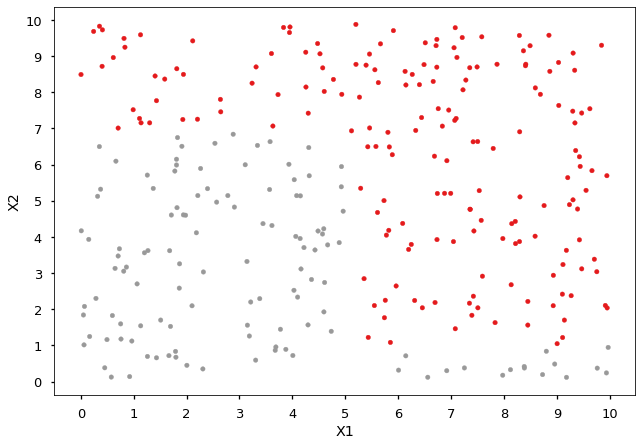

In [4]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [5]:
# 'horizontal' or 'vertical'
q1_direction = 'vertical'
# Between 0 and 10
q1_threshold = 5

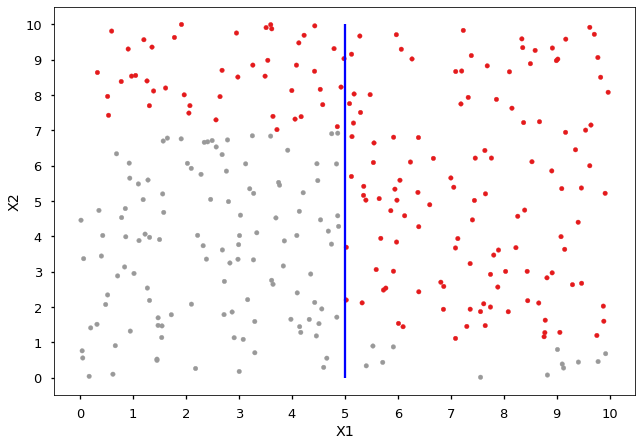

In [6]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

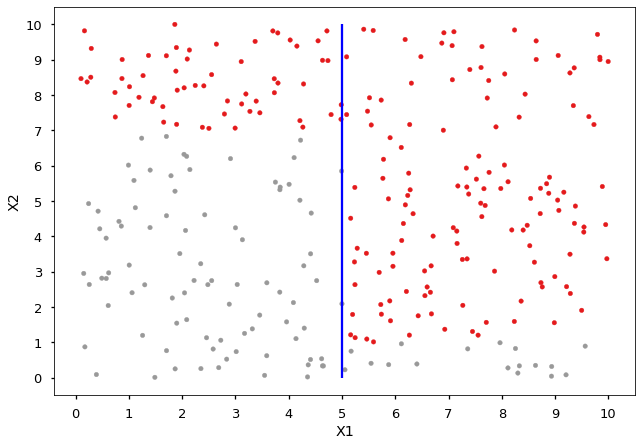

In [7]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [8]:
# 'horizontal' or 'vertical'
q2_direction = 'horizontal' 
# Between 0 and 10
q2_threshold = 7


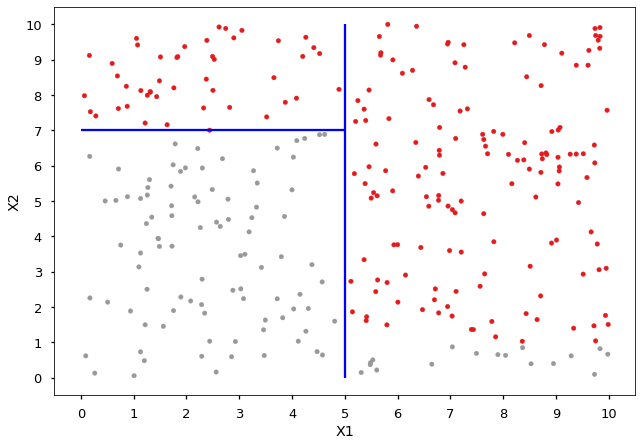

In [9]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

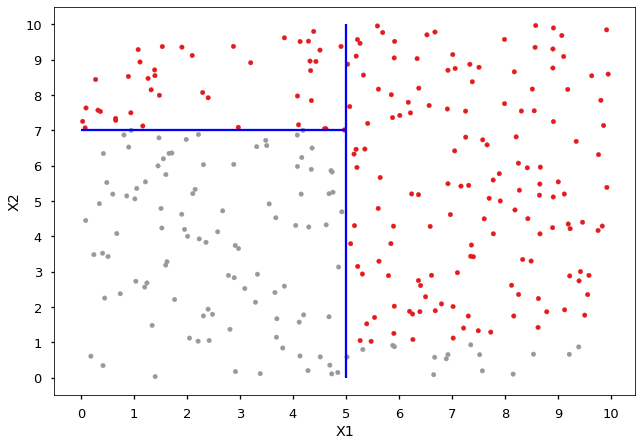

In [10]:
q2_direction = 'horizontal'
q2_threshold = 7

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [11]:
# 'horizontal' or 'vertical'
q3_direction = 'horizontal'
# Between 0 and 10
q3_threshold = 1

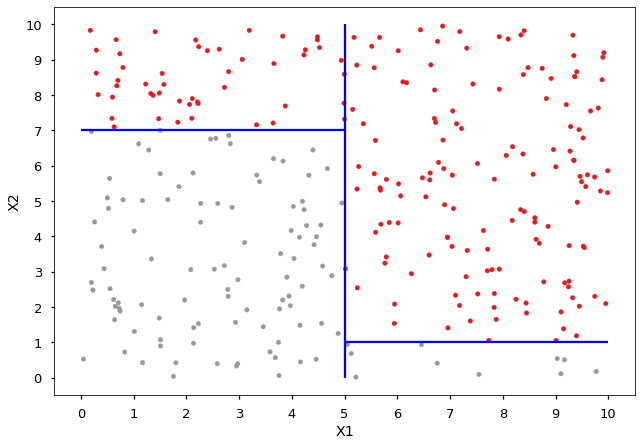

In [12]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

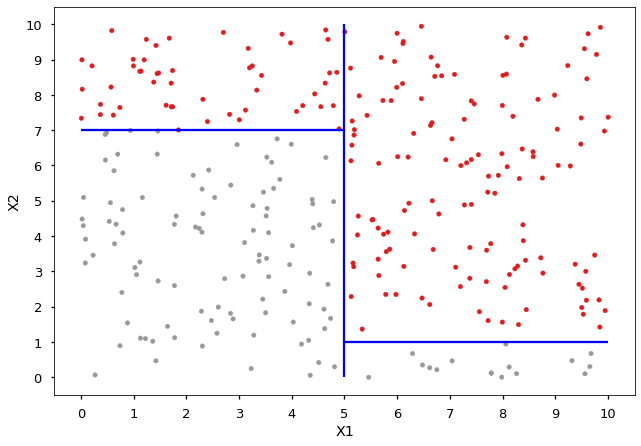

In [13]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

# Visual Example of a Decision Tree

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

<img src="../images/ex-decision-tree.png">

## DAG Definition


- Direction Acyclic Graph
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

# Entropy and Information Gain


## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__

> The entropy of a variable is the "amount of information" contained in the variable. 

> Shannon’s entropy quantifies the amount of information in a variable, thus providing the foundation for a theory around the notion of information.

- we can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 


## Entropy and decision trees

> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>

$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$

- measuring the difference in entropy from before the split (an untidy sock drawer) to after the split (a group of white socks and underwear, and a group of non-white socks and underwear).

- Information gain allows us to put a number to exactly how much we've reduced our _uncertainty_ after splitting a dataset $S$ on some attribute, $A$.  The equation for information gain is:

$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 

In the ID3 algorithm, we use entropy to calculate information gain, and then pick the attribute with the largest possible information gain to split our data on at each iteration. 


# Decision Tree Process

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

1. There are features and a target (what class the data point is)
2. Make a *decision* (a split) based on some *metric* using the features
    - data are split into partitions
3. Continue on each partition, and do more splits for each using the features in that partition
4. Keep doing that until a **stopping condition** is hit
    - Number of data points in a final partition
    - Layers deep
    

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=650>

**Greedy search:**
- We make the most optimal split at each decision (**greedy**) decision which doesn't necessarily lead to the overall most optimal solution

# Implementation

## Hyper Parameter Tuning with Trees

### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

## SEE LABS FROM CLASS FOLDER FOR HYPERPARAMETER TUNING NOTEBOOK

# Questions / Comments